<h2 style="text-align:center;font-weight:bold">Business understanding - Board Game Data Analysis for Winter Season Strategies</h2>

Welcome to my board game data analysis project! My primary objective is to extract valuable insights and create a comprehensive strategic plan for the upcoming winter season. Using statistical methods and data visualizations, I aim to gain a deep understanding of the current situation and identify relevant information within the data.

The first step will involve conducting an exploratory analysis of the data, delving into the available information on board games. I will analyze various game metrics and identify key variables that impact outcomes. This will allow us to uncover patterns and trends that can contribute to the formulation of an effective strategy.

After the exploratory analysis, I will tailor the subsequent steps to suit the specific needs of your business. This may involve applying advanced analytical techniques, developing predictive models, or conducting detailed simulations to evaluate different scenarios and their potential outcomes.

Based on my analysis, I will present the findings in a clear and concise manner, providing actionable insights to assist in decision-making. Thank you for your interest in this project, and I look forward to collaborating with you to achieve your business objectives.

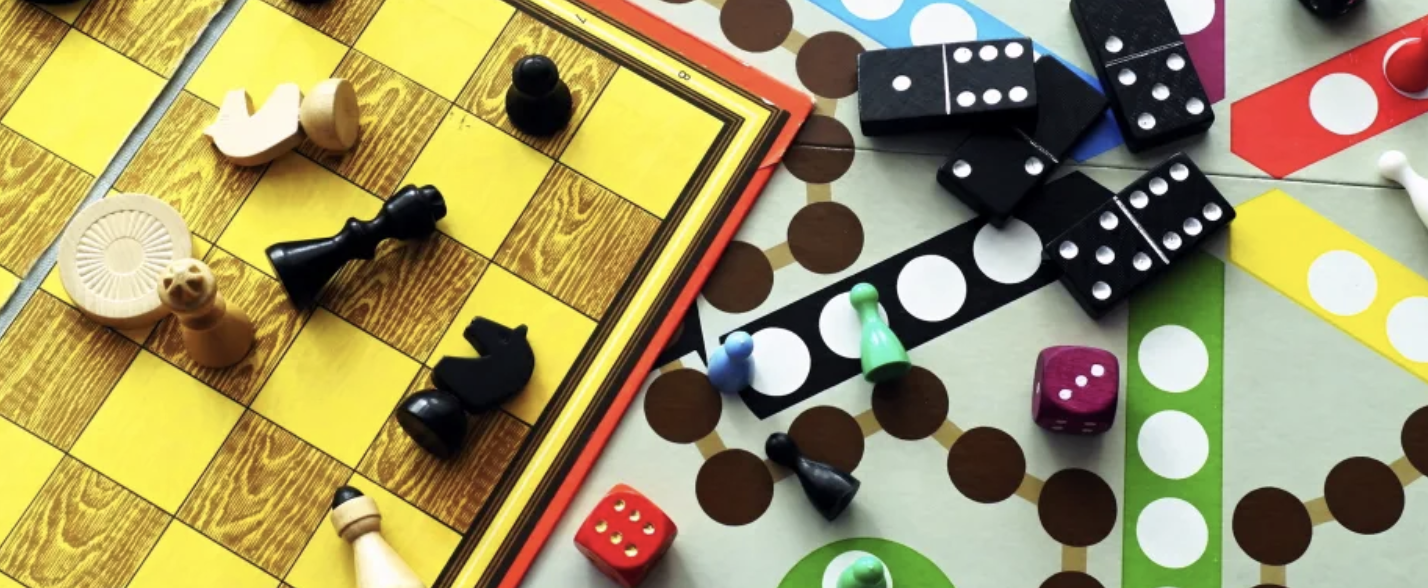

Source: Data from (Lisa, 2019)

# 

### Data Dictionary 

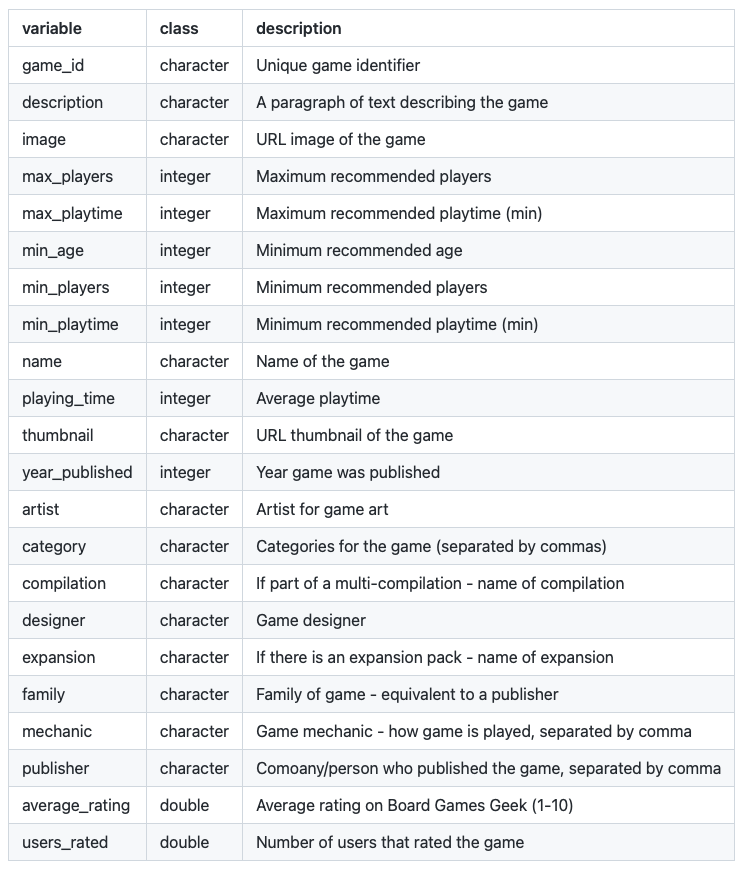

# 

### Libraries

Setting up the environment and loading the major libraries needed for this data analysis. 

In [1]:
# Suppress warnings.
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package.
import numpy as np
import pandas as pd

# Visualisation Libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# 

<h2 style="text-align:center;font-weight:bold">Exploratory Data Analysis (EDA) </h2>

The data exploration phase is a crucial step in the analysis process. This dataset is relatively small, with only 10,532 rows and 22 columns. Additionally, it demonstrates that this dataset has missing values that need to be looked at further. Furthermore, the display function and the available data dictionary both show that each attribute has a correct title. This ensures that the data can be properly analysed.

In [2]:
# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df = pd.read_csv("board_games.csv", na_values=missing_value_formats)

# Checking missing values.
if df.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

# Display first and last 5 records.
display(df.head())
display(df.tail())

# Display shape.
print("Shape of the dataset:", df.shape)
print("\nInformation about the dataset:\n")

# Returns the info.
df.info()

There are missing values in the data.


game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           240  ...   
1       12            3            30    Dragonmaster            30  ...   
2       10            2            30         Samurai            60  ...   
3       12            2            60  Tal der Könige            60  ...   
4       12            3            90         Acquire            90  ...   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   

                designer expansion  \
0     Karl-Heinz Schmiel       NaN   
1  G. W. "Jerry" D'Arcey       NaN   
2          Reiner Knizia       NaN   
3      Christian Beierer       NaN   
4            Sid Sackson       NaN   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...        7.66508   
1                           E.S. Lowe,Milton Bradley        6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...        7.44119   
3                                             KOSMOS        6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...        7.35830   

  users_rated  
0        4498  
1         478  
2       12019  
3         314  
4       15195  

[5 rows x 22 columns]

game_id                                        description  \
10527   214996  Description from the publisher:&#10;&#10;Silve...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10530   216201  The race is on for the robots of the Robo Rall...   
10531   216725  The deluxe edition comes in a double tall box ...   

                                              image  max_players  \
10527  //cf.geekdo-images.com/images/pic3093082.png            2   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10530  //cf.geekdo-images.com/images/pic3374227.jpg            6   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   

       max_playtime  min_age  min_players  min_playtime  \
10527           480       12            1            30   
10528            45       13            2            45   
10529            20       12            2            20   
10530           120       12            2            20   
10531            60       14            1            30   

                                                    name  playing_time  ...  \
10527  Silver Bayonet: The First Team in Vietnam, 196...           480  ...   
10528               Codex: Card-Time Strategy – Core Set            45  ...   
10529                                     Wind the Film!            20  ...   
10530                                  Robo Rally (2016)           120  ...   
10531    Villages of Valeria: Deluxe Kickstarter Edition            60  ...   

                       artist                                     category  \
10527          Charles Kibler                          Vietnam War,Wargame   
10528                     NaN  Card Game,Fantasy,Fighting,Video Game Theme   
10529  宝井 貴子 (Takako Takarai)                                    Card Game   
10530                     NaN            Miniatures,Racing,Science Fiction   
10531    Mihajlo Dimitrievski                      Card Game,City Building   

                                             compilation  \
10527                                                NaN   
10528                                                NaN   
10529                                                NaN   
10530                                                NaN   
10531  Villages of Valeria,Villages of Valeria: Bard ...   

                             designer  \
10527  Gene Billingsley,Mitchell Land   
10528                    David Sirlin   
10529                          Saashi   
10530                Richard Garfield   
10531   Rick Holzgrafe,Isaias Vallejo   

                                               expansion  \
10527                                                NaN   
10528  Codex: Card-Time Strategy – Flagstone Dominion...   
10529                                                NaN   
10530                                                NaN   
10531                                                NaN   

                                           family  \
10527                      GMT Operational System   
10528                              Fantasy Strike   
10529                                         NaN   
10530                                      Robots   
10531  Crowdfunding: Kickstarter,Tableau Building   

                                                mechanic  \
10527                                    Hex-and-Counter   
10528  Deck / Pool Building,Hand Management,Variable ...   
10529                     Hand Management,Set Collection   
10530  Action / Movement Programming,Grid Movement,Mo...   
10531                      Card Drafting,Hand Management   

                         publisher average_rating users_rated  
10527                    GMT Games        8.35333          75  
10528                 Sirlin Games        8.08780          82  
10529              Saashi & Saashi        7

Shape of the dataset: (10532, 22)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion

Upon examining the dataset, it was discovered that it contains 9 integer variables (int), which may be discrete variables or categorical variables with possible codes, such as 0 and 1 (True and False). In addition, there are 12 variables (object) that potentially contain text or characters and could be categorical variables, as well as variables (float) that could be continuous numerical variables, although further investigation is required to confirm this.

The Non-Null and Count sections of the dataset reveal that some variables contain missing values as previously seen. However, in the following scripts, a function will be called to further investigate and address any missing values.

In accordance with Roddewig (2022) "Duplicate data takes up unnecessary storage space and slows down calculations at a minimum. At worst, duplicate data can skew analysis results and threaten the integrity of the data set."

In [3]:
# Check for duplicate rows.
duplicate_rows_df = df[df.duplicated()]

# Print the number of duplicate rows found and additional information.
if duplicate_rows_df.shape[0] > 0:
    print("The dataset contains", duplicate_rows_df.shape[0], "duplicate rows.")
    print("Here are the first few duplicate rows:")
    print(duplicate_rows_df.head())
else:
    print("No duplicate rows were found in the dataset.")

No duplicate rows were found in the dataset.


# 

### Checking for missing values

The info( ) method has already identified missing values in the dataset, but the isnull( ).sum( ) method displays the number of them in each column. (pandas.pydata.org, n.d.)

In [4]:
# Check for null values.
null_values = df.isnull().sum().sort_values()

# Print the number and percentage of null values found for each column.
print("Null values per column:")
print(null_values)

Null values per column:
game_id               0
year_published        0
average_rating        0
playing_time          0
name                  0
min_playtime          0
users_rated           0
min_age               0
max_playtime          0
max_players           0
description           0
min_players           0
image                 1
thumbnail             1
publisher             3
category             94
designer            126
mechanic            950
artist             2773
family             2808
expansion          7780
compilation       10122
dtype: int64


It was found that 10 columns in the dataset, including one with more than 90% of the values, had missing values in close to 50% of the columns. While it's essential to take these values into account while preparing data, it's also necessary to analyse the business's interests to make sure that data processing and investigations are not done in vain. 

As mentioned by Sinek (2009) "Starting with Why has become a well-known purpose lecture. He begins by asking himself, Why do we do this? How do we do this? What do we do? It's a great way to focus in on what's really essential for moving the project forward."

Because this part only deals with exploration throughout the project it will be determined whether these data should be handled or not, with the project's interests in mind.

# 

### Descriptive Statistics 

As believed by Terrell Hanna and Biscobing (2021) "Data exploration is the first step in data analysis involving the use of data visualization tools and statistical techniques to uncover data set characteristics and initial patterns."

In accordance with Narkhede (2018) "Descriptive statistics involves summarizing and organizing the data so they can be easily understood."

To visualise some of most significant statistical data, describe() is recommended. It may help in determining the type of the variable. (Mckinney, 2013)

In [5]:
# Viewing some statistical information.
df.describe().T.round(2)

count      mean       std      min      25%       50%  \
game_id         10532.0  62059.20  66223.72     1.00  5444.50  28822.50   
max_players     10532.0      5.66     18.88     0.00     4.00      4.00   
max_playtime    10532.0     91.34    659.75     0.00    30.00     45.00   
min_age         10532.0      9.71      3.45     0.00     8.00     10.00   
min_players     10532.0      2.07      0.66     0.00     2.00      2.00   
min_playtime    10532.0     80.88    637.87     0.00    25.00     45.00   
playing_time    10532.0     91.34    659.75     0.00    30.00     45.00   
year_published  10532.0   2003.07     12.28  1950.00  1998.00   2007.00   
average_rating  10532.0      6.37      0.85     1.38     5.83      6.39   
users_rated     10532.0    870.08   2880.21    50.00    85.00    176.00   

                      75%       max  
game_id         126409.50  216725.0  
max_players          6.00     999.0  
max_playtime        90.00   60000.0  
min_age             12.00      42.0  
min_players          2.00       9.0  
min_playtime        90.00   60000.0  
playing_time        90.00   60000.0  
year_published    2012.00    2016.0  
average_rating       6.94       9.0  
users_rated        518.00   67655.0

In [6]:
# Viewing some statistical information.
df.describe(include='object').T

count unique                                                top  \
description  10532  10528  How could that have happened? Black Stories ar...   
image        10531  10527       //cf.geekdo-images.com/images/pic2410035.png   
name         10532  10357                                         Robin Hood   
thumbnail    10531  10527     //cf.geekdo-images.com/images/pic2410035_t.png   
artist        7759   4641                                    Franz Vohwinkel   
category     10438   3860                               Wargame,World War II   
compilation    410    336           Traveller: The Classic Games, Games 1-6+   
designer     10406   4678                                       (Uncredited)   
expansion     2752   2634  Règlement de l'An XXX,Regulations of the Year ...   
family        7724   3918                          Crowdfunding: Kickstarter   
mechanic      9582   3209                                    Hex-and-Counter   
publisher    10529   5512                                          GMT Games   

            freq  
description    3  
image          2  
name           5  
thumbnail      2  
artist       166  
category     449  
compilation    8  
designer     558  
expansion      7  
family       391  
mechanic     523  
publisher    180

# 

### Data Visualization

At this point of the project, relevant statistical analyses for this project will be addressed, along with different data visualisation techniques.

As claimed by Brush (2020) "Data visualization provides a quick and effective way to communicate information in a universal manner using visual information. The practice can also help businesses identify which factors affect customer behavior; pinpoint areas that need to be improved or need more attention; make data more memorable for stakeholders; understand when and where to place specific products; and predict sales volumes."

In [7]:
# Print the column names.
print("Column names:")
print(df.columns)

Column names:
Index(['game_id', 'description', 'image', 'max_players', 'max_playtime',
       'min_age', 'min_players', 'min_playtime', 'name', 'playing_time',
       'thumbnail', 'year_published', 'artist', 'category', 'compilation',
       'designer', 'expansion', 'family', 'mechanic', 'publisher',
       'average_rating', 'users_rated'],
      dtype='object')


# 

# 

 <h2 style="text-align:center;font-weight:bold">Top 5 Average Game Rated</h2>

To find good and well-liked options for the upcoming winter season strategy, It'll evaluate the best 5 games based on average scores in this step. These games were selected based on user reviews, and they meet a high level of quality that makes them worthwhile to check out.

#### Data preparation

Data preparation is a firt step before generating data visualizations. It involves selecting relevant data from the database and preparing it for analysis and visualization. Lohr (2014) of The New York Times said: "Data scientists, according to interviews and expert estimates, spend 50 percent to 80 percent of their time mired in the mundane labor of collecting and preparing unruly digital data, before it can be explored for useful nuggets."

For instance, in selecting the top five games, the nlargest( ) method was utilized. To ensure a clean and organized table, a rounding operation was performed. Lastly, the dataframe's indexes were reset to start at 0 using the reset_index( ) function. These steps help ensure readability in the final outcome of the data visualizations. (pandas.pydata.org, n.d.)

In [8]:
# Select the top five games.
X = df['average_rating'].nlargest(5).values
y = df['name'][df['average_rating'].nlargest(5).index].values

# Creating a new data frame.
data = np.concatenate([y.reshape(-1,1), np.round(X, 2).reshape(-1,1)], axis=-1)
names = ['Game Names', 'Average Rated']
df_1 = pd.DataFrame(data, columns=names).reset_index(drop=True)

#### Data Visualization : Bar chart

The bar chart was selected as the visualisation form for this type of ranking because it gives users the ability to visually compare the values of each item in relation to the other items in the ranking. They are also flexible, enabling users to alter the colors, add annotations, and rotate the bars to best serve the visualisation's objectives.

As stated by Murray (2019) "Simply put, bar charts are really good at what they do: they’re quick to create, show comparisons clearly, and are easy for the audience to understand. It’s a classic bar chart: horizontal bars, sorted in descending order. The horizontal bars allow your brain to compare two states based on the bar length while vertical reference lines give you the magnitude for each state."

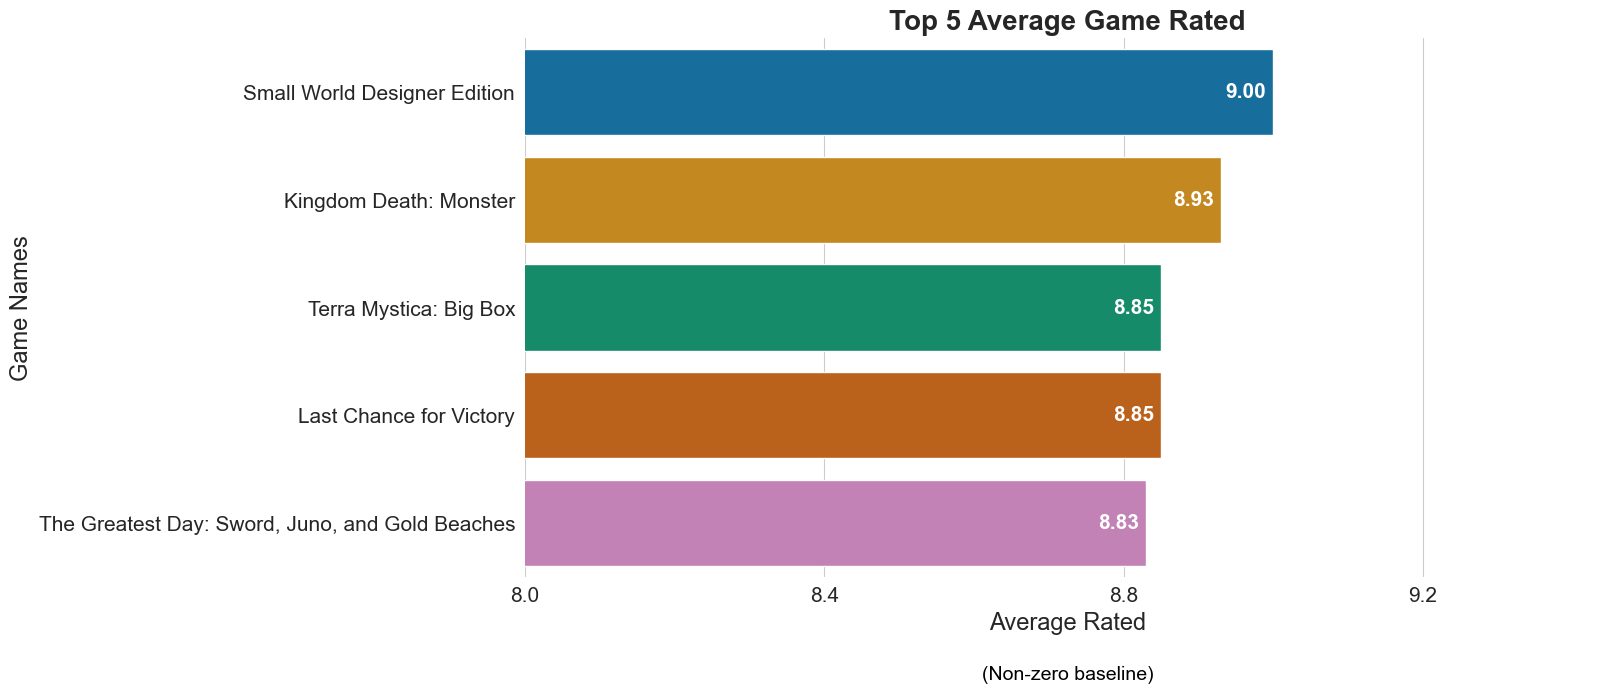

In [9]:
# Bar chart Seaborn (Top 5 Average Game Rated)

# Define graph width and height.
WIDTH = 1400 
HEIGHT = 700 

# Setting the bar chart style.
sns.set_style("whitegrid") # White background with gridlines.
sns.set_palette("colorblind") # Distinguishable for people with color vision deficiencies.

# Generate a barplot.
ax = sns.barplot(x='Average Rated', y='Game Names', data=df_1, orient='h')
ax.set_title('Top 5 Average Game Rated', fontsize=20, fontweight='bold', ha='center') # Title.
ax.figure.set_size_inches(WIDTH/100, HEIGHT/100) # Set the width and height.
sns.despine(left=True, bottom=True) # Remove the spines.
ax.set_xlim(8, None) # Non-zero baseline + annotation.  
ax.annotate('(Non-zero baseline)', xy=(0.5, -0.18), xycoords='axes fraction', ha='center',va='center', fontsize=14, color='black', annotation_clip=False)

# Configure x,y-axis settings.
ax.set_xlabel('Average Rated', fontsize=17)
ax.set_ylabel('Game Names', fontsize=17)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.tick_params(axis='y', which='both', labelsize=15)
ax.set_xticks(np.arange(8, 9.4, 0.4)) # Adjusting chart intervals.


# Add the average rated inside the bar(annotation).
for patch in ax.patches: # Calculate the average rated value for the bar.
    avg_rated = patch.get_width()
    ax.annotate('{:.2f}'.format(avg_rated), xy=(patch.get_x() + patch.get_width(), patch.get_y() + patch.get_height() / 2),
        xytext=(-5, 0), textcoords="offset points", # Annotation positions.
        ha='right', va='center', fontsize=15, fontweight='bold', color='white')

# Show.
plt.show()

#### Outcome : Top 5 Average Game Rated

According to average user ratings, the best five board games are: Small World Designer, Kingdom Death: Monster, Terra Mystica: Big Box, Last Chance for Victory and The Greatest Day: Sword, Juno, and Gold Beache.

It can be useful for game developers, retailers, and players alike to know the best five board games based on average user ratings. They can use this information to determine the most famous types of gaming and the features or gameplay elements that players like best. This information can be used as a tool for the different gaming industry stakeholders in general.

It is also possible to look at the ranking and the rate values in the table below. As claimed by Radusinovic (2022) "Table data visualization is also a great way to help people grasp data. Since it is easier for people to perceive, they can readily identify patterns and trends."

In [10]:
# Display the dataframe.
display(df_1.head().style.hide_index().format({'Average Rated': '{:.2f}'}))

# 

 <h2 style="text-align:center;font-weight:bold">Correlation between the Users Rated  and the Max Playtime </h2>

The correlation between users who rated a board game and maximum playing time, revealing player behavior and preferences. It helps designers and enthusiasts create more engaging games for their audience.

#### Data preparation : Scatter Plot

The code first uses the sort_values( ) function to sort the original DataFrame df by the values in the 'average_rating' column in descending order. This allows for strategic analysis based on the rate of users, which is an important variable in this business. (pandas.pydata.org, n.d.)

Next, the code selects the top 100 games with the highest average rating to plot as samples. This is done to ensure that the graph doesn't get too messy with data. (Matalka, 2023) 

As reported by Yi (2018) "When we have lots of data points to plot, this can run into the issue of overplotting. Overplotting is the case where data points overlap to a degree where we have difficulty seeing relationships between points and variables."

The iloc method is used to select the rows and columns of interest, while the round( ) method is used to round the values for better visualization. To create a data frame the three columns of interest, stored in X, y, and z, horizontally using numpy.concatenate( ). Finally, new column names are defined at the end for easier chart viewing. (numpy.org, n.d.)

In [11]:
# Sort the DataFrame by column 'average_rating' in descending order.
df_sorted = df.sort_values('average_rating', ascending=False)

# Select the first 100 rows.
X = df_sorted.iloc[:100, 4:5].round().values
y = df_sorted.iloc[:100, 21:22].round().values
z = df_sorted.iloc[:100, 20:21].round(2).values


# Creating a new data frame.
data = np.concatenate([X, y, z], axis=-1)
names = ['Max Play Time', 'Users Rated', 'Average Rated']
df_2 = pd.DataFrame(data, columns=names)

#### Data Visualization: Scatter Plot

The scatterplot will be used to do correlation analysis at this step, which determines whether there is a relationship between the two variables. The outliers are also found using this method. (Ciccarello, 2018)

Also with Mindrila and Balentyne (2017) "The most useful graph for displaying the relationship between two quantitative variables is a scatterplot."

In [12]:
# Scatter Plot Seaborn (Correlation between the Users Rated  and the Max Playtime)

# Width and height.
plt.figure(figsize=(8, 6))

# Create a scatter plot using seaborn.
sns.scatterplot(x='Max Play Time', y='Users Rated', data=df_2, s=100)
sns.despine(right=True, top=True) # Remove the spines.

# Set the title and axis labels.
plt.title('Correlation between the Users Rated and the Max Playtime', fontsize=18, fontweight='bold')
plt.xlabel('Max Play Time', fontsize=16)
plt.ylabel('Users Rated', fontsize=16)
plt.tick_params(axis='both', labelsize=12) #xy-axis settings.

# Show.
plt.show()

#### Outcome : Scatter Plot between the Users Rated and the Max Playtime

In order to find any correlation, multiple charts were created using various samples, in some cases with all the variables. In this case, no causal relationship was identified. 

Based on the average user ratings, a sample of 100 primary data points was chosen in order to accomplish the task's visualisation requirement.

Below are approaches for correlation at the level of comparison and validity of the found outcomes. (A Plus Topper, 2020)

Source: Data from (A Plus Topper, 2020)

### Pearson's Correlation

One of the most popular methods we use to quantify a link between two variables in statistics is the Pearson correlation coefficient, its value is between -1 and 1. When both variables rise at the same time, there is a positive correlation between them; conversely, when there is a negative correlation, the effects are opposite. It's critical to remember that only quantitative values have an impact on the relationship. (Ramzai, 2020)

To analyse notable statistical points, it will compute the Pearson correlation among the numerical variables in this dataset. This will enable us to analyze the relationships between the other dataset variables and verify the findings of the earlier graph.

#### Data preparation : Pearson's Correlation

Following the removal of category variables and variables that made no significant addition to the studies, it was determined whether any variables had missing values.

In [13]:
# Removing categorical variables and variables that are not relevant to the study.
df_corr = df.drop(['game_id', 'description', 'image','name', 'thumbnail','artist','category', 'compilation', 'designer','expansion', 'family', 'mechanic', 'publisher'], axis=1)

# Check for null values.
null_values = df_corr.isnull().sum().sort_values()

# Print the number of null values for each column.
print("Null values per column:")
print(null_values)

Null values per column:
max_players       0
max_playtime      0
min_age           0
min_players       0
min_playtime      0
playing_time      0
year_published    0
average_rating    0
users_rated       0
dtype: int64


Since no missing values were identified, the correlation matrix calculation will proceed.

#### Data Visualization: Heatmap Pearson's Correlation

As claimed by Yi (2021) "A heatmap is a graphical representation of data that uses a color-coding scheme to represent different values. In the context of Pearson correlation, a heatmap is an effective way to visualize the correlations between pairs of variables. Heatmaps are particularly useful for visualizing Pearson correlation because they allow the viewer to quickly and easily identify the strength and direction of the correlation between pairs of variables."

In [14]:
# Heatmap Pearson's Correlation.

# Plot Pearson correlation matrix of numerical variables.
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df_corr.corr(method='pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
cmap = sns.color_palette("coolwarm", as_cmap=True) # Create a coolwarm heatmap.

# Heatmap with masked upper triangle and with annotations.
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True,square=True, linewidths=.8, cbar_kws={"shrink": .8})

# Set title and axis labels.
ax.set_title('Pearson Correlation of Numerical Variables', fontsize=20, pad=18, fontweight='bold')
ax.set_xlabel("Features", fontsize=16, labelpad=12)

# Show.
plt.show()

#### Outcome : Pearson Correlation of Numerical Variables Heatmap 

The strength of the association between the two variables, which is highlighted by the heat map's distributed colouring, can be determined by looking at the absolute value of Pearson's correlation coefficient. (Nickolas, 2021)

Analyzing the heat map, it turns out that there is no correlate that displays out in favour of the topic under investigation. The scatter plot results are further supported by the heatmap, which shows no correlation (-0.0043) between users rated variables and max playing time.

Although there is a nearly perfect correlation between game times, it is not a significant measure because the highest and minimum numbers represent opposing extremes with no linear relationship. Furthermore, game lengths can vary significantly based on the qualities and difficulty of each game, consequently considerations other than maximum and minimum times must be considered. 

Finally, there is a fairly positive association connecting the average rating and the year of publication, indicating that public ratings of games do in fact evolve with time.

# 

<h2 style="text-align:center;font-weight:bold">Distribution of game categories</h2>

The distribution of game categories is important for understanding the gaming market, user preferences, and competition. It can provide insights into which types of games are popular or growing, reveal user behaviors and preferences, and help game companies make informed decisions about product strategy, marketing, and positioning.

#### Data preparation : Bar Chart

First, we will select the "category" variable from our dataset. As we saw during the initial exploratory analysis, this variable contains 94 missing values, which represent less than one percent of the total value. However, we need to remove these missing values to ensure continuity in our analysis. Since the missing values are categorical and their value is very insignificant, they are not relevant for our study. Therefore, we will drop them from the dataset. (Vanderplas, 2017 p.124)

In [15]:
# Selecting the 'category' column and dropping any rows with missing values.
df_3 = df['category'].dropna()

if df_3.isna().sum().sum() == 0:
    print("There are no missing values in the 'category' column.")
else:
    print("There are still missing values in the 'category' column.")

There are no missing values in the 'category' column.


In [16]:
# Splitting the comma and separated values into separate rows.
df_3 = df_3.str.split(',').explode()

# Splitting again by the '/' character.
df_3 = df_3.str.split('/', expand=True).explode(0)

# Grouping by the categories and counting their frequency.
df_3 = (df_3.groupby(0)
         .size()
         .reset_index(name='Frequency')
         .assign(Percentage=lambda x: (x['Frequency'] / x['Frequency'].sum() * 100).round(2)) # New column 'Percentage'.
         .sort_values('Frequency', ascending=False) # Sorting by frequency in descending order.
         .rename(columns={0: 'Category'}))# Renaming the column to 'Category'.

# Display first and last 5 records.
display(df_3.head().style.hide_index().format({'Percentage': '{:.2f}'}))
display(df_3.tail().style.hide_index().format({'Percentage': '{:.2f}'}))

It was important to clean and analyse data in the games category column at this phase. Using the split( ) and explode( ) functions, the above code divides comma-separated values in one column into distinct lines and divides data in another column by the '/' character. (Clarke, 2022)

It then groups the resulting values by category and counts their frequency using the groupby( ) and size( ) functions, calculates the percentage of each category to see how much each category represents in the whole context, and sorts the resulting DataFrame by frequency in descending order to see which categories are most commonly implemented in the games, and renames the column 'Category'. (Gurav, 2022)

Finally, it shows the first and last five records of the processed DataFrame to reassure the analyst that the steps were followed correctly throughout the process, resulting in relevant insights from the data.

#### Data Visualization

As believed by Mindrila and Phoebe (2018) "The distribution of a variable shows what values it takes and how often it takes these values. Distributions can be displayed using a variety of graphical tools, Categorical variables should be displayed using pie charts or bar graphs."

Because this is a project about visualisation techniques, here is a picture that highlights key points. In keeping with  VELEZ (2021) "A histogram is on the left, and to the right is a bar chart (also known as a bar graph). Histograms and bar charts look almost identical, yet they are dramatically different. Understanding their differences is important, so you know when to use each one and accurately convey—or consume—the insights they contain."

Source: Data from (VELEZ, 2021)

According to the references above, it was decided to visualise the data with a bar chart, with the first visualisation showing only the ten most frequent categories, generating information with rankings, so we know which are the most commonly found in this game database, and the second showing the complete distribution of all game categories in this database, thus achieving another requirement of this project.

#### Bar Chart (top 10 categories)

In [17]:
# Distribution of game categories

# Define width and height.
WIDTH = 1300
HEIGHT = 800

# Sorting by frequency in descending order, and select the top 10 categories.
top_categories = df_3.sort_values('Frequency', ascending=False).iloc[:10]

# Plot the bar chart. with single color.
ax = sns.barplot(data=top_categories, x='Frequency', y='Category', orient='h', color='steelblue') # Single color.
ax.set_title('Distribution of Game Categories Top 10', fontsize=20, fontweight='bold') #Title.
ax.figure.set_size_inches(WIDTH/100, HEIGHT/100) # Set the width and height.
sns.despine(left=True, bottom=True) # Remove spines.

# Configure x,y-axis settings.
ax.set_xlabel('Frequency', fontsize=17)
ax.set_ylabel('Category', fontsize=17)
ax.tick_params(axis='x', which='both', labelsize=13)
ax.tick_params(axis='y', which='both', labelsize=13)

# Show.
plt.show()

#### WordCloud (Distribution)

This visualization creates a WordCloud to display the frequency of categories in the dataset. By concatenating all categories into a single string, a WordCloud image is generated using a color map. The WordCloud visually represents the importance of each category based on its frequency, with larger and bolder words indicating higher occurrence. This visualization provides an intuitive and visually appealing way to understand the distribution and prominence of different categories within the dataset.

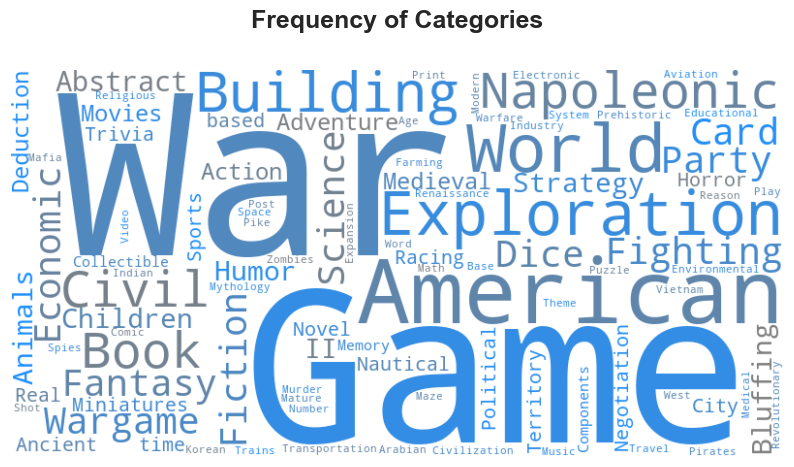

In [18]:
# Distribution of game categories.

# Concatenate all categories into a single string.
categories_text = " ".join(category for category in df_3['Category'])

# Create a color map.
cmap = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['#1E90FF','grey'])

# Create a WordCloud object and generate the word cloud image.
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, stopwords=STOPWORDS, colormap=cmap).generate(categories_text)

# Plot the WordCloud.
plt.figure(figsize=(10, 8))
plt.title('Frequency of Categories', fontsize=18,fontweight='bold', pad=30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show.
plt.show()

#### Outcome : Distribution of Game Categories

The game category distribution is skewed. As reported by "Skewness is a well-established statistical concept for continuous and, to a lesser extent, for discrete quantitative statistical variables."

However, analyzing the visualization and table above might highlight significant points such as:

* Card games are the category with the largest frequency, making up 10.87% of all the games in the sample. This shows that a significant number of board gamers enjoy playing card games.


* Having a frequency of 7.42%, "Wargame" is the second most popular category. With a frequency of 4.44%, "Fantasy" is the third most popular genre. One category is made up of games that mimic military operations and conflict resolution strategies, and the other is made up of themes involving mythical creatures, magic, and other paranormal elements.When these two well-known categories' scenarios are contrasted, it's outstanding to note how different they are from one another.


* The fact that the first five categories—Card Game, Wargame, Fantasy, Fighting, and Economic—represent more than 30% of the total frequency and the final five—Pike and Shot, Game System, American Indian Wars, Korean War, and Expansion for Base-Game—account for less than 0.5% of the total frequency—indicates that the categories are fairly distributed. This shows that there are a lot of games in a few specific categories.

This is an excellent example of users acceptability and capitation in connection with the highest-ranking categories under in the "Card Game" context. 

As stated by Tinsman (2014) "It has crossover potential. This means it could get new kinds of players to become interested in the product line. This is one reason why you see so many licensed products. For example, Blizzard and Upper Deck partnered to create the World of Warcraft Trading Card Game. Blizzard hoped that card gamers would cross over to become online gamers, and Upper Deck hoped the product could bring online gamers into card games."

In [19]:
# Select columns and sort by average rating in descending order.
df_3_a = df[['category', 'average_rating', 'name']]
df_3_a = df_3_a.sort_values(by='average_rating', ascending=False)
df_3_a = df_3_a.rename(columns={'category': 'Category', 'average_rating': 'Average Rating', 'name': 'Name'})
df_3_a['Average Rating'] = df_3_a['Average Rating'].apply(lambda x: '{:.2f}'.format(x)) # Round 2 decimal places.
df_3_a = df_3_a[['Name', 'Category', 'Average Rating']] # Reorder columns.

# Display the first 10 rows.
df_3_a.head(10).style.hide_index()

In [20]:
# Create a subset of the categories and sort the DataFrame by 'Percentage'.
subset = df_3[df_3['Category'].isin(['Environmental', 'Medical', 'Civil War'])]
subset = subset.sort_values('Percentage', ascending=False)
subset['Percentage'] = subset['Percentage'].apply(lambda x: '{:.2f}'.format(x)) # Round 2 decimal places.

# Display the subset.
subset.head().style.hide_index()

It's important to keep in mind that even while some game categories are less popular than others, they can still deliver games that are popular by players and attract positive reviews.

  As it can see from the chart above, some of the games with the highest user ratings fall under the categories of Civil War 0.18%, Environmental 0.26%, and Medical 0.11%. Despite the fact that these subcategories still only make up a small portion of all categories, players seem to enjoy this particular game.

Because categories' popularity might change over time as new board games and themes hit the market, it is advantageous for businesses to track distribution together and analyse their success rates.

# 

<h2 style="text-align:center;font-weight:bold">Comparing Average Game Ratings before and after 1992</h2>

Board games have been a popular source of entertainment for many years; in this respect, checking ratings of a board game on popularity is a good strategy. We wish to compare average board game ratings before and after 1992 in order to reveal insights into user ratings even after games have been widely released on the market. Although the gaming industry encompasses various fields, it is intriguing to examine the board game market and its target audience. (Byrd, 2022)

#### Data preparation :  Box Plot and Line Chart

The average rating of board games released before and after 1992 will be analysed using this data preparation. A new data frame was made just for this purpose, with the columns "year_published" and "average_rating" as its only contents. A datetime object was created from the "year_published" column and set as the new DataFrame's index. (Kaushik, 2022)

The DataFrame was then grouped by year, and using the resample( ) method with the input "Y" (yearly), the average of the "average_rating" column was determined for each year. (Garg, 2021)

Following that, the "Average Rating" column was adjusted to two decimal places, and the average rating before and after 1992 was computed using the mean( ) technique and the loc( ) function to filter data based on year. 

Lastly, creating a column called Year to separate the groups before and after 1992.

In [21]:
# Create a new DataFrame.
df_4 = (df[['year_published', 'average_rating']]
             .rename(columns={'year_published': 'Year Published', 'average_rating': 'Average Rating'}))

# Convert year_published to datetime and set it as the index.
df_4['Year Published'] = pd.to_datetime(df_4['Year Published'], format='%Y')
df_4.set_index('Year Published', inplace=True)

# Group by year and calculate the mean of average_rating for each year.
df_4 = df_4.resample('Y').mean()
df_4 = df_4.round({'Average Rating': 2}) # Round average_rating to two decimal.

# Calculate the average rating before and after 1992
avg_before_1992 = df_4.loc[df_4.index.year <=1992, 'Average Rating'].mean()
avg_after_1992 = df_4.loc[df_4.index.year >1992, 'Average Rating'].mean()

# Create a new column to the time periods before and after 1992.
df_4['Period'] = 'Before 1992'
df_4.loc[df_4.index.year >= 1992, 'Period'] = 'After 1992'

#### Data Visualization: Box Plot

The average ratings per year were grouped together in the previous stage, and they will now be compared using a box plot. This allows us to examine the distribution of numbers and the total mean value before and after 1992, making it easier to detect outliers. In this case, a bar chart may be used to quickly indicate average values, however this is already done clearly and objectively in the text below the graphic. (Yi, 2021a)

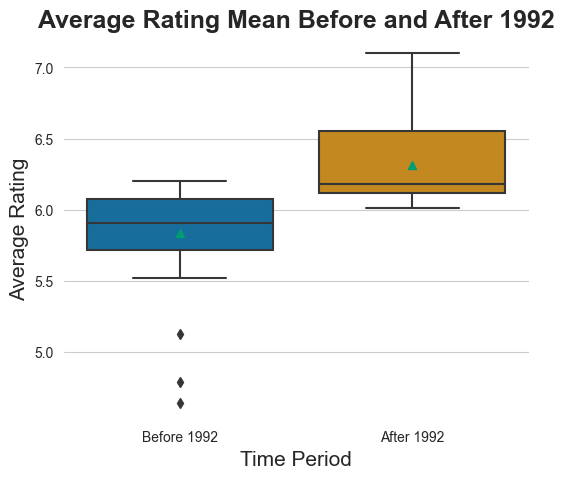

Average rating mean before 1992: 5.84
Average rating mean after 1992: 6.32


In [22]:
# Box plot (Comparing Average Game Ratings before and after 1992) 

# Define width and height.
WIDTH = 600
HEIGHT = 500

# Create a box plot.
sns.boxplot(x='Period', y='Average Rating', data=df_4, showmeans=True)

# Set the chart title.
plt.title('Average Rating Mean Before and After 1992', fontsize=18, fontweight='bold') # Title.
plt.gcf().set_size_inches(WIDTH/100, HEIGHT/100) # Width and height.
sns.despine(left=True, bottom=True) # Remove spines.

# Configure x,y-axis settings.
plt.xlabel('Time Period', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.tick_params(axis='x', which='both', labelsize=10)
plt.tick_params(axis='y', which='both', labelsize=10)

# Show.
plt.show()

# Print the average rating mean before and after 1992
print(f"Average rating mean before 1992: {avg_before_1992:.2f}")
print(f"Average rating mean after 1992: {avg_after_1992:.2f}")

#### Data Visualization: Line Chart

The average game rating over time was plotted using a line chart in this code using Plotly Express. This not only answers to the subject under discussion but also enables the study of the average rating behaviour over time.

According to  HOOPER (2021) "Line charts are used to show how a change in one variable or number affects changes in another. They are often used to show, for example, changes that happen over time."

In [23]:
# Line plot (Comparing Average Game Ratings before and after 1992)

# Line plot. 
fig = px.line(df_4, x=df_4.index, y=df_4['Average Rating'], text=df_4['Average Rating'], title="MEAN Average Rating over the Years",)

# Update line.
fig.update_traces(mode='lines', # Display a line chart.
    line=dict(color='blue', width=2)) # Line color and width.

# Update the layout.
fig.update_layout(plot_bgcolor="white", # Background color.
    hovermode="x", # Hovermode(x)
    title_font=dict(size=22), # Title 
    width=1000, 
    height=600)

# Add vertical line.
fig.add_vrect(x0="1992", x1="1992", annotation_text="1992", annotation_position="top left", annotation=dict(font_size=20), opacity=0.5, line_width=6)

# Configure x-y-axis.
fig.update_xaxes(mirror=True,  # Display ticks inside the plot area.
    ticks='outside',  # Display ticks outside the plot area.
    showline=True, # Display axis line.
    linecolor='black', # Set axis line color to black.
    tickfont=dict(size=14)) # Set the size of the tick labels font.
fig.update_yaxes(mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    tickfont=dict(size=14))

# Show .
fig.show()

#### Outcome : Comparing Average Game Ratings before and after 1992

To get right to the point, the answer to the question "Do older games (from 1992 and earlier) have a higher AVERAGE "Average Rating" than newer games (after 1992)?" No, newer games have a higher rating average than older games, according to the findings above.

In [24]:
# Print the average rating mean before and after 1992.
print(f"Average rating mean before 1992: {avg_before_1992:.2f}")
print(f"Average rating mean after 1992: {avg_after_1992:.2f}")

Average rating mean before 1992: 5.84
Average rating mean after 1992: 6.32


   * This is also evident in the box plot, where the second group obtains all the data completely above the 6 rating, as well as in the line plot, which shows an upward trend relative to the first group.   
   
   
   * The visualisation also showed more information, one of which was a trend of positive ratings in relation to the company's progress. We even noticed this result ( 0.31 Pearson Correlation ) in the heat map plotted above, suggesting that there may be a possible relationship between a company's length of operation and positive review ratings for its products.
   

   * Longer-running businesses may have accumulated a reputation for quality and client satisfaction over time. The quantity of good ratings a product obtains, however, also depends on other elements including product innovation, customer service, and marketing. (Khadka and Maharjan, 2017)


   * The average customer rating has been increasing over time in this instance, which is a great indication of how well the products have performed. 

According to Fan and Fuel (2016) " 92% of consumers hesitate to make a purchase if there are no customer review and 97% say customer reviews factor into their buying decision"." 

Also Research Centre (2017) shows that " 95% of shoppers read reviews before making a purchase."

   * Another interesting aspect was the outliers displayed in the box plot, which gives points to years in which the rating average was significantly lower than the average for the other years. This can also be observed in the low points displayed on the line graph.

For an upcoming study in the future, it might be interesting for the company to investigate the leads of these casualties. In addition to the possible variables already identified in this database that could have contributed to these scenarios, there are many other potential causes, including the nature of the business's operations, marketing efforts, the product itself, and many others during that particular time period.

# 

<h2 style="text-align:center;font-weight:bold">Three most common Mechanics</h2>

The mechanics of table games are investigated in terms of player decision-making, game play, and overall experience. A method for classification may be essential for business strategies since it provides information on the kind of games that are in demand, assisting manufacturers and venders in making informed decisions. 

In accordance with Luke (2018) “Game mechanics are constructs of rules or methods designed for interaction with the game state, thus providing gameplay.” 

#### Data preparation :  Bart Chart

Select the "mechanic" variable from our dataset as a starting point. This variable has 950 missing values, which is a significant number and represents 9.01% of the entire column, as we noticed during the initial exploratory study. For our study to continue, we must take these missing data out. It is risky to impute values without fully understanding and comprehending the business since missing values are categorical. Let's thus remove them from the dataset. (Vanderplas, 2017 p.124)

In [25]:
# Selecting the 'mechanic' column and dropping any rows with missing values.
df_5 = df['mechanic'].dropna()

if df_3.isna().sum().sum() == 0:
    print("There are no missing values in the 'mechanic' column.")
else:
    print("There are still missing values in the 'mechanic' column.")

There are no missing values in the 'mechanic' column.


This step of preparation is similar to the category data preparation covered in the previous two sections. In brief, the data were split up by commas and slashes, then grouped and counted, and a new df was created with frequency and %. The same functions from the Pandas library were used in both processes. (pandas.pydata.org, n.d.)

In [26]:
# Splitting the comma and separated values into separate rows.
df_5 = df['mechanic'].str.split(',').explode()

# Dividing the values in the column again by the '/' character.
df_5 = df_5.str.split('/', expand=True).explode(0)

# Grouping by the 'mechanic' and counting their frequency.
df_5 = df_5.groupby(0).size().reset_index(name='Frequency')
df_5['Percentage'] = (df_5['Frequency'] / df_5['Frequency'].sum() * 100).round(2) # Adding a new column 'Percentage'.

# Sorting the 'grouped_mechanic' DataFrame by frequency in descending order.
df_5 = df_5.sort_values('Frequency', ascending=False)
df_5 = df_5.rename(columns={0: 'Mechanic'}) # Renaming the column.

# Select the top 3 most frequent mechanics.
top_3_mechanics = df_5.nlargest(3, 'Frequency')

#### Data Visualization: Bar Chart

In this project, we have dealt with ranking before, and the three most common board game mechanisms are no different at this stage. Next, this task will be displayed through a bar chart.

As maintained by K. EMERY (2017) "Use Horizontal Bar Charts when you’re graphing nominal Variables. Nominal variables—favorite ice cream flavors, types of organizations where conference attendees are employed—can be arranged in any order." 

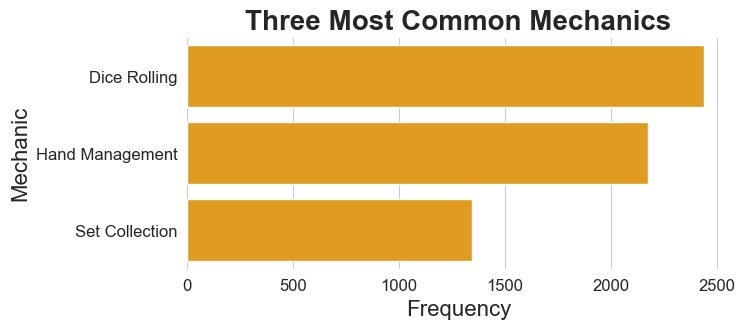

In [27]:
# Bar Chart (Three most common Mechanics)

# Width and height.
WIDTH = 700 
HEIGHT = 300 

# Create a horizontal stacked bar chart.
ax = sns.barplot(x='Frequency', y='Mechanic', data=top_3_mechanics, orient='h', color='orange')
ax.set_title('Three Most Common Mechanics', fontsize=20, fontweight='bold') # Title.
ax.figure.set_size_inches(WIDTH/100, HEIGHT/100) # Set the width and height.
sns.despine(left=True, bottom=True) # Remove the spines.

# Configure x,y-axis settings.
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Mechanic', fontsize=16)
ax.tick_params(axis='x', which='both', labelsize=12)
ax.tick_params(axis='y', which='both', labelsize=12)

# Show.
plt.show()

#### Data Visualization: Bar Chart (Highlighting Color)

Another interesting technique for this type of visualisation to present more details while maintaining the context where the main outcome must be presented, is to use colour as an addition to emphasise a specific finding or as an extra highlight coding. 

According to Yi (2021c) "There are cases where color can be added to emphasize a specific finding or as an extra highlighting encoding."

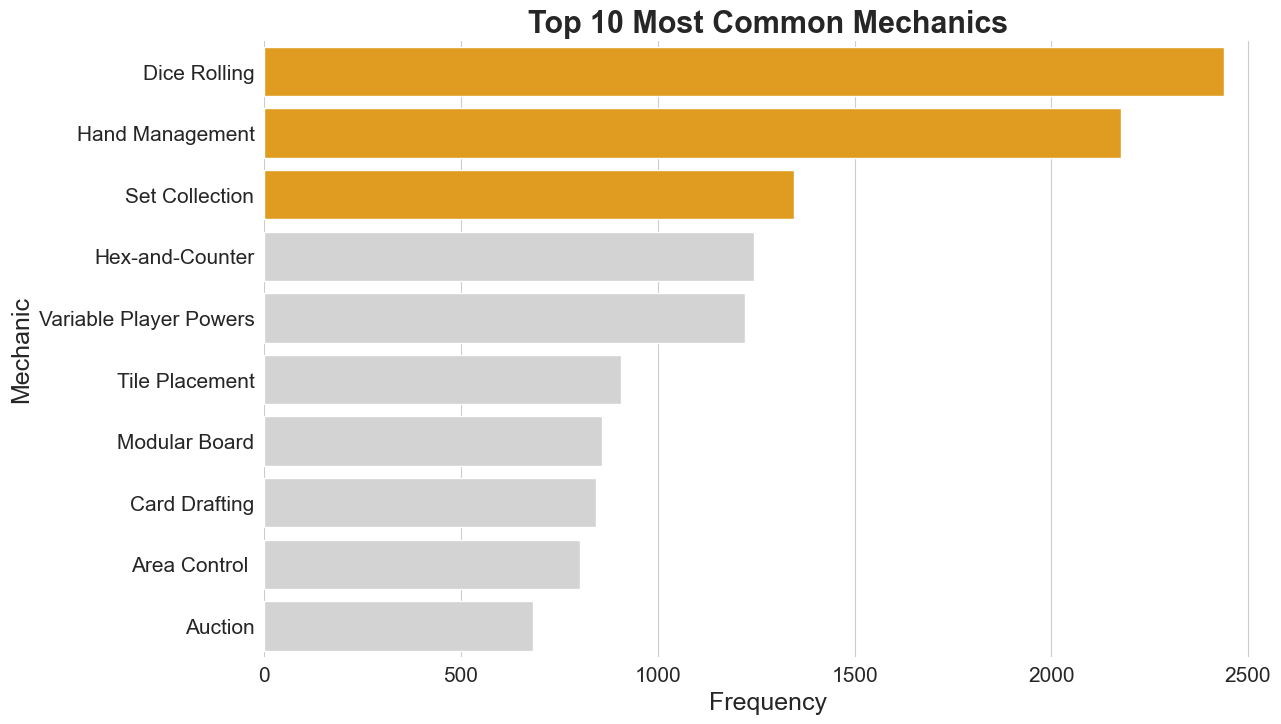

In [28]:
# Bar Chart (Highlighting Color) Top 10 most frequent mechanics.

# Select the top 10 most frequent mechanics
top_10_mechanics = df_5.nlargest(10, 'Frequency')
colors = ['orange' if i < 3 else 'lightgray' for i in range(len(top_10_mechanics))] # Set colors for the bars.

# Width and height.
WIDTH = 1300
HEIGHT = 800 

# Create a horizontal stacked bar chart.
ax = sns.barplot(x='Frequency', y='Mechanic', data=top_10_mechanics, orient='h', palette=colors)
ax.set_title('Top 10 Most Common Mechanics', fontsize=22, fontweight='bold') # Title.
ax.figure.set_size_inches(WIDTH/100, HEIGHT/100) # Width and height.
sns.despine(left=True, bottom=True) # Remove spines.

# Configure x,y-axis settings.
ax.set_xlabel('Frequency', fontsize=18)
ax.set_ylabel('Mechanic', fontsize=18)
ax.tick_params(axis='x', which='both', labelsize=15)
ax.tick_params(axis='y', which='both', labelsize=15)

# Show.
plt.show()

For example, in the view above, the three most popular board game mechanics from this database were highlighted, and even more brought a raking with the top ten highlighting the top three, as requested by the task.

The structure of the graph in respect to the visualisation and the parameters remains the same, with the exception of a little preparation of the data prior to plotting. The number of selected values is first increased from three to ten, and then a small function is created that adjusts the colours of the bars, creating a list of colours in which the first three bars are coloured orange and the rest are light grey, and this function assigns a value to the colours assigned to the chart palette parameter. (pandas.pydata.org, n.d.)

However, this graph was created only for exploring the idea of using colours as highlight coding; for the purpose of evaluating the outcomes, only what was determined by the task will be addressed.

#### Outcome : Three Most Common Mechanics

According to the bar chart and the table below, Dice Rolling, Hand Management, and Set Collection have the highest frequencies, with 2438, 2176, and 1347 respectively, they being this group of board games' most common mechanic.

In [29]:
# Displaying the three highest frequencies.
display(df_5.nlargest(3, 'Frequency').style.hide_index().format({'Percentage': '{:.2f}'}))

Over 10% and 9% of all the games in the sample, respectively, use dice rolling and hand management, indicating their reasonably high frequency.

Depending on the goal of the analysis, comparing rankings from different studies might be a valuable strategy. It is simple to determine which ones are in comparable situations. (Aline et al., 2016)

At the level of analysis and comparison of the company's ranking, By Atlas (2022) " This is a ranked listed of all the board game mechanics most popular."

**1- Hand Management (ranks second)**

**2- Set Collection (ranks third)**

3- Engine Building

4- Drafting

5- Area Control

6- Cooperative Play

**7- Dice Rolling (ranks the first place)**

8- Variable Player Powers

9- Worker Placement

10- Tile Placement

(Atlas, 2022)

It is clear that all of the company's mechanisms are ranked in these studies, but the position of the dice-rolling mechanics sticks out as being the most different.

# 

<h2 style="text-align:center;font-weight:bold">Number of Board Games Released and Annual Growth Rate over the  years</h2>

A study of the number of games launched by a business over the years, as well as their annual growth, can be a useful tool for determining the company's success in the gaming market, how much the company invests in development and creation, as well as how active it is in terms of releases. (Bhasin, 2019)

As maintained by Bhasin (2019) "In the present competitive environment, companies spend a million dollars on the product launch of a product to get the attention of customers and to get the maximum sales in the initial months when the product is launched."

According to Gangaraju (2022) " A product launch is a company’s coordinated effort to bring new or updated products to market. Well-planned and well-performed launches announce a product to the world after building substantial buzz. They also align members of a product team with other departments to ensure the entire business is unified in its approach to supporting the new product."

Maintaining in accordance with Gangaraju (2022) "Planning a thorough product launch requires investing a great deal of labor and time. However, product-centric companies will find these commitments worth the effort. A successful launch can attract the right kind of customers to a new product. This increases the rate of product adoption and allows a company to see a quicker return in their investment in the product’s development."

Looking at game release data over time, we may see patterns and trends in the company's annual growth. Unfortunately, we did not have access to the company's financial information at the time, which would have allowed us to further investigate annual growth. However, that study might provide useful information about the business's efficiency in terms of product creation, market positioning, and growth plans.

According to the Buffoni et al. (2017), product launches are literally tied to the revenues and profitability of the business at the level of knowledge "Any company looking to boost revenue growth needs to launch new products or services. More than 25 percent of total revenue and profits across industries comes from the launch of new products.

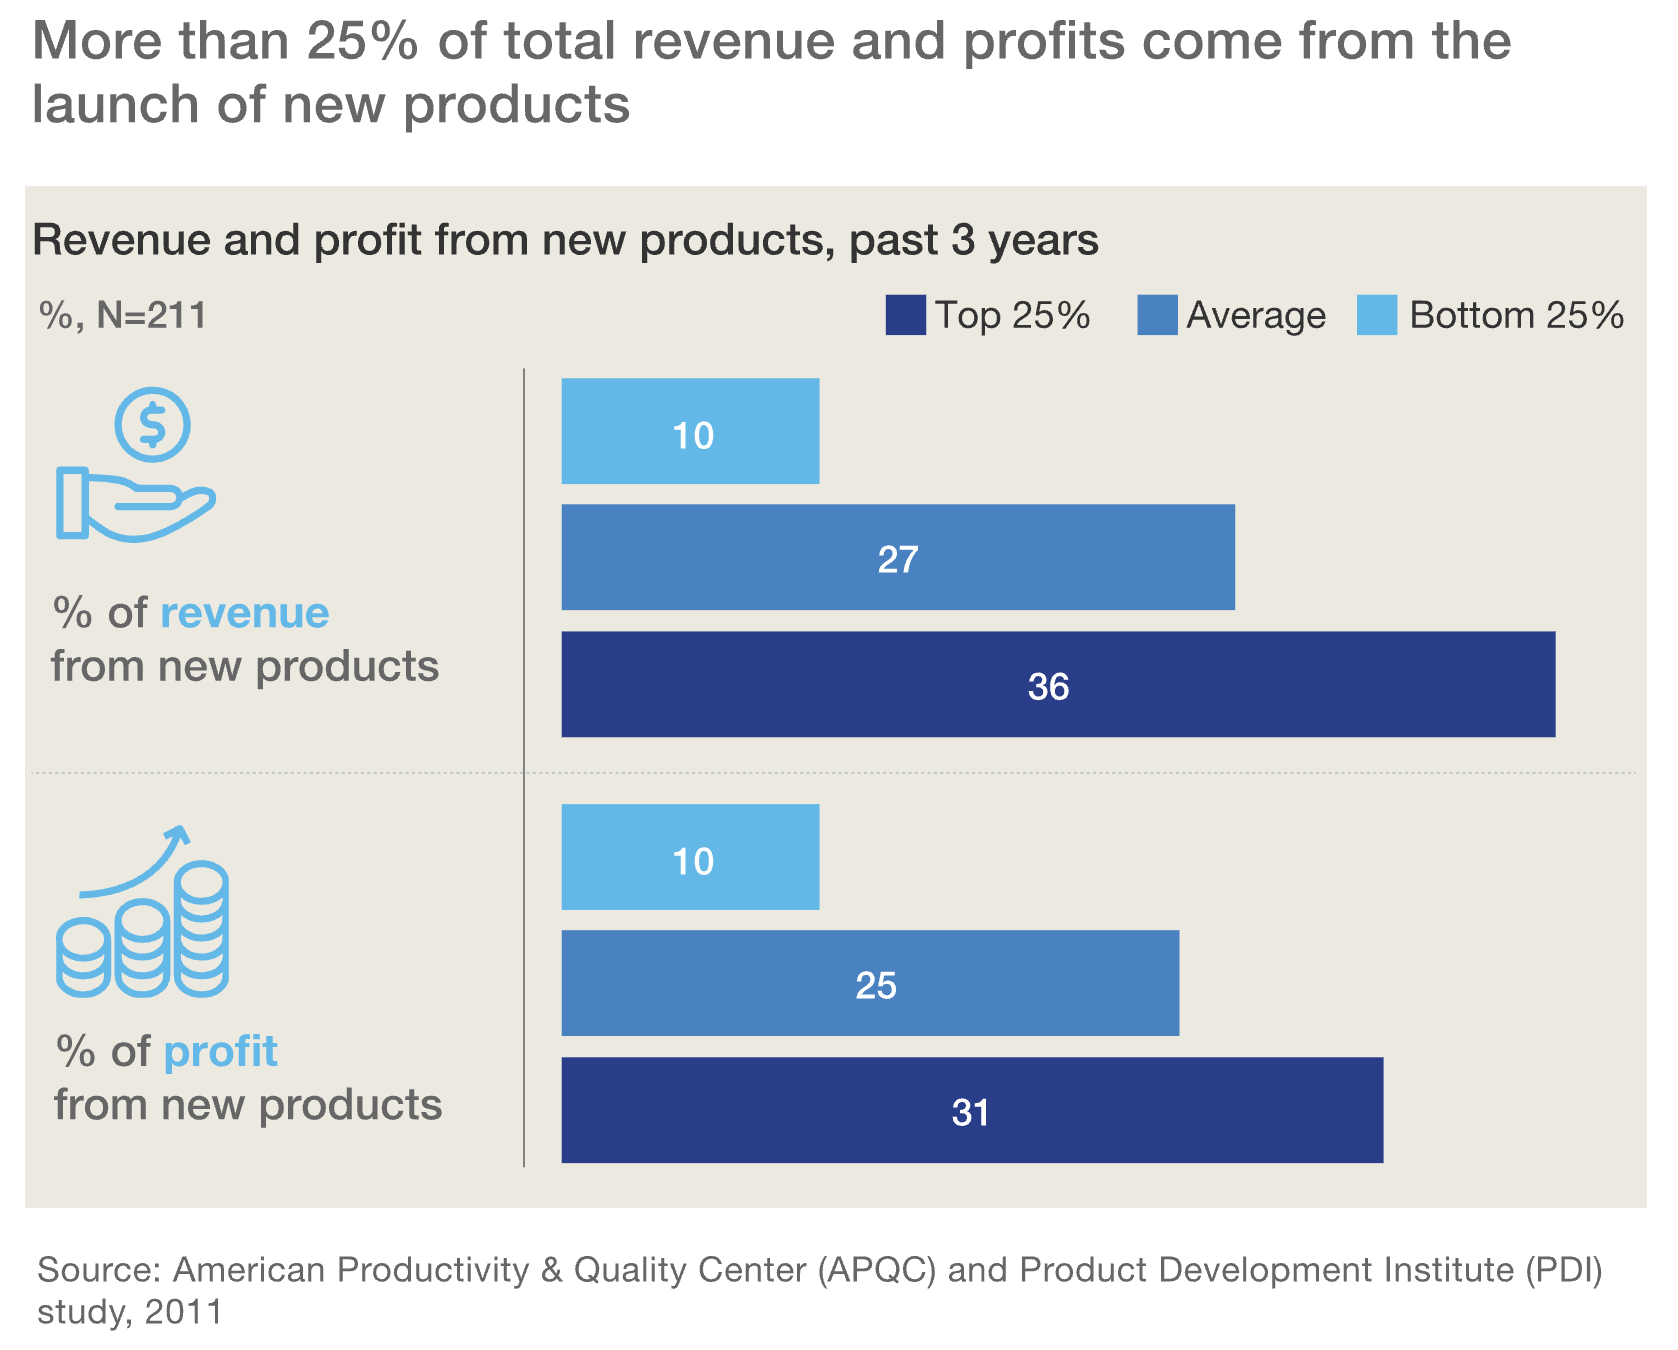

Source: Data from (Buffoni et al., 2017)

#### Data preparation : Line Chart

The number of published games and the annual growth based on these launches will be visualised and compared on a subset of lines in this stage. In order to organise the data and arrange it for any future labels, this code first selects only two columns, "name" and "year_published," and renames them to "Game Name" and "Year Published," respectively. (pandas.pydata.org, n.d.)

The "Year of Publication" column is then converted to date format, making a new column called "Year." The data is then grouped by year, the number of games released each year is counted, and the resulting columns are given names like "Year" and "Number of games released," respectively. (pandas.pydata.org, n.d.)

Finally, using the pct_change( ) function to determine the annual growth rate of released games and adds a new column to the dataframe "Annual Growth Rate," removing any NaN values from the first line due to the calculation of the Annual Growth Rate. (Naveed, 2022)

In [30]:
# Select columns and rename them.
df_6 = df[['name', 'year_published']].rename(columns={'name': 'Game Name', 'year_published': 'Year Published'})

# Convert the 'Year Published' column to datetime.
df_6['Year Published'] = pd.to_datetime(df_6['Year Published'], format='%Y')
df_6['Year'] = df_6['Year Published'].dt.year

# Get the count of games released per year.
df_6 = df_6.groupby('Year')['Game Name'].count().reset_index()
df_6.columns = ['Year', 'Number of Games Released']

# Add a new column with the annual growth rate.
df_6['Annual Growth Rate'] = df_6['Number of Games Released'].pct_change() * 100
df_6.dropna(inplace=True)

As maintained by Chen (2019) "Growth rates refer to the percentage change of a specific variable within a specific time period. Growth rates can be positive or negative, depending on whether the size of the variable is increasing or decreasing over time. Growth rates were first used by biologists studying population sizes, but they have since been brought into use in studying economic activity, corporate management, or investment returns." The fundamental annual growth formula is given below by James Chen at the level of knowledge.

<center><b>Annual Growth Rate = ((Present or Future Value - Past or Initial Value) / Past or Initial Value) * 100</b></center>


Source: Data from (Chen, 2019)

#### Data Visualization: Line Chart (two y axes)

As previously stated, a line graph will be used to demonstrate these two trends over time. Having two set y axes, the graph is simple to read even when scales are different, and it is also simple to comprehend and compare these two variables.

As stated by Stack (2023) "A line chart is the best option for looking at a detailed time series or for adding trend lines. If you add a trend line to a line chart, the trend line will appear in the same color as the metric it represents. You can add trend lines either when you add a new metric."

In [31]:
# Line Chart (two y axes) Number of Board Games Released and Annual Growth Rate over the years.

# Create subplots.
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add first line and setting Hovermode.
fig.add_trace( go.Scatter(x=df_6['Year'], y=df_6['Number of Games Released'], name='Number of Games Released', hovertemplate='Year: %{x}<br>Number of Games Released: %{y}'),
    secondary_y=False) # Because they are different lines.

# Add second line and setting Hovermode.
fig.add_trace(go.Scatter(x=df_6['Year'], y=df_6['Annual Growth Rate'], name='Annual Growth Rate', hovertemplate='Year: %{x}<br>Annual Growth Rate: %{y:.2f}%'),
    secondary_y=True) # Because they are different lines.

# Update line.
fig.update_traces(line=dict(width=2))

# Update the layout settings for the plot.
fig.update_layout(plot_bgcolor="white", # Background color.
    title='Number of Games Released and Annual Growth Rate', title_font=dict(size=22),  # Title. 
    width=1000,height=600, # Width and height.
    legend=dict(x=0,y=1,orientation='h'))

# Set y-axes.
fig.update_yaxes(title='Number of Games Released',range=[0, max(df_6['Number of Games Released']) * 1.1],secondary_y=False)
fig.update_yaxes(title='Annual Growth Rate (%)',range=[df_6['Annual Growth Rate'].min() * 1.1, df_6['Annual Growth Rate'].max() * 1.1],secondary_y=True)

# Configure x-y-axis.
fig.update_xaxes(mirror=True,  # Display ticks inside the plot area.
    ticks='outside',  # Display ticks outside the plot area.
    showline=True, # Display axis line.
    linecolor='black', # Set axis line color to black.
    tickfont=dict(size=14)) # Set the size of the tick labels font.
fig.update_yaxes(mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    tickfont=dict(size=14),
    secondary_y=False)

# Configure the second y-axis.
fig.update_yaxes(mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    tickfont=dict(size=14),
    secondary_y=True,)

# Show the plot.
fig.show()

#### Outcome : Number of Board Games Released and Annual Growth Rate over the  years

This line chart has many different bits of information that can be extracted and even investigated; a few of them are listed below in a very general and broad manner:

   * From just 2 games in 1951 to 608 games in 2016, the number of games released has grown consistently over time. There have been some fluctuations, but growth is on the way. This shows a growing market and ongoing prospects for game development. It also suggests that the industry as a whole is getting more productive in terms of delivering new games. Best of all, as seen in the previous line chart, this tendency is supported by positive user reviews.
   
  
   * Despite having significant fluctuations across years, the annual growth rate of game releases has been generally positive. Even though this may suggest that the sector is expanding overall, it can be critical to investigate why there are rare decreases in growth rate, such as if there has been an external difficulty like a recession or changes in consumer behaviour.
   
   
   * The annual growth rate has been dropping in recent years, with a notable decline in 2016. This indicates that the industry's growth may be slowing or maybe stopping. It is necessary to look at the reasons behind this and practical approaches to stop the trend.

# 

<h2 style="text-align:center;font-weight:bold">Conclusion</h2>

This study aimed to investigate and visualise data from a board game company in order to address a number of questions related to the business's interests.

To address these queries and further investigation, a variety of statistical and visualisation techniques have been studied, commented on, and described step-by-step with references to previously published research.

In conclusion, the study was successful in providing answers to various pertinent concerns for the business and in providing transparent and fair visualisations to make it easier to comprehend the findings.

<center><b>“Data really powers everything that we do.” — Jeff Weiner</b></center>


# 

<h2 style="text-align:center;font-weight:bold">Reference list</h2>

A Plus Topper. (2020). Scatter Plots and Correlation. [online] Available at: https://www.aplustopper.com/scatter-plots-correlation/.

Abba, I.V. (2023). pandas.DataFrame.sort_values - How To Sort Values in Pandas. [online] freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/how-to-sort-values-in-pandas/ [Accessed 18 Apr. 2023].

Aline, K., Becker, W., Giovanela, A. and Furtado (2016). Planejamento estratégico. [online] Available at: https://www.uniasselvi.com.br/extranet/layout/request/trilha/materiais/livro/livro.php?codigo=22984.

Anderson, J. (2018). Why Are Customer Reviews So Important? [online] Medium. Available at: https://medium.com/revain/why-are-customer-reviews-so-important-185b915d4e5d.

Atlas, B.G. (2022). Popular Board Game Mechanics. [online] Board Game Atlas. Available at: https://www.boardgameatlas.com/mechanics.

Bhasin, H. (2019). What is Product Launch - Examples, Types, Advantages. [online] Marketing91. Available at: https://www.marketing91.com/product-launch/.

Brock, T. (2015). It’s The Little Things That Matter: Axes, Tick Marks, Tick Labels, and Grid Lines | Infragistics Blog. [online] www.infragistics.com. Available at: https://www.infragistics.com/community/blogs/b/tim_brock/posts/it-39-s-the-little-things-that-matter-axes-tick-marks-tick-labels-and-grid-lines.

Brush, K. (2020). What is data visualization and why is it important? [online] SearchBusinessAnalytics. Available at: https://www.techtarget.com/searchbusinessanalytics/definition/data-visualization.

Buffoni, A., de Angelis, A. de A., Krieg, A. and Grüntges, V. (2017). How to make sure your next product or service launch drives growth | McKinsey. [online] www.mckinsey.com. Available at: https://www.mckinsey.com/capabilities/growth-marketing-and-sales/our-insights/how-to-make-sure-your-next-product-or-service-launch-drives-growth.

Byrd, M. (2022). Why 1992 Is the Year That Changed Gaming Forever. [online] Den of Geek. Available at: https://www.denofgeek.com/games/1992-changed-gaming-most-important-games-retrospective/.

Carvalho, T. (2021). Exploring Line Charts with Python’s Matplotlib. [online] Medium. Available at: https://towardsdatascience.com/exploring-line-charts-with-pythons-matplotlib-4b911cf6b4bc [Accessed 19 Apr. 2023].

Chen, J. (2019). Growth Rates. [online] Investopedia. Available at: https://www.investopedia.com/terms/g/growthrates.asp.

Choudhury, S. (2014). Grid Lines: Chart Junk or Visual Aids? [online] FusionBrew - The FusionCharts Blog. Available at: https://www.fusioncharts.com/blog/grid-lines-chart-junk-or-visual-aids/ [Accessed 12 Apr. 2023].

Chun-Houh Chen, Wolfgang Karl Härdle, Unwin, A. and Springerlink (Online Service (2008). Handbook of Data Visualization. Berlin, Heidelberg: Springer Berlin Heidelberg.

Ciccarello, N. (2018). Customizing scatter plots. [online] Nicky Loves Data. Available at: https://www.nickylovesdata.com/blog/customizing-scatter-plots [Accessed 14 Apr. 2023].

Clarke, M. (2022). How to use Pandas explode() to split a list column into rows. [online] practicaldatascience.co.uk. Available at: https://practicaldatascience.co.uk/data-science/how-to-pandas-explode-to-split-a-list-column-into-rows [Accessed 18 Apr. 2023].

Codecademy. (n.d.). Seaborn Styling, Part 1: Figure Style and Scale. [online] Available at: https://www.codecademy.com/article/seaborn-design-i.

Computational and Inferential Thinking (2022). 7.1. Visualizing Categorical Distributions — Computational and Inferential Thinking. [online] inferentialthinking.com. Available at: https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html.

Connors, L. (2023). plotly.py. [online] GitHub. Available at: https://github.com/plotly/plotly.py/blob/master/doc/python/subplots.md [Accessed 16 Apr. 2023].

Data Visualization Standards Beta (2023). Legends | Data Visualization Standards. [online] xdgov.github.io. Available at: https://xdgov.github.io/data-design-standards/components/legends [Accessed 16 Apr. 2023].

Delgado, H. (2019). The Temperature of Data. [online] Zen of Data. Available at: https://medium.com/zen-of-data/the-temperature-of-data-f058a172e3d8 [Accessed 7 Apr. 2023].

Duggal, N. (2020). Covariance vs. Correlation: Definition, Differences, Applications. [online] Simplilearn.com. Available at: https://www.simplilearn.com/covariance-vs-correlation-article.

Fan and Fuel (2016). No online customer reviews means BIG problems in 2017 - Fan and Fuel. [online] Fan and Fuel. Available at: https://fanandfuel.com/no-online-customer-reviews-means-big-problems-2017/.

Gangaraju, N. (2022). What is a Product Launch? Stages, Strategy, & Tools. [online] Amplitude. Available at: https://amplitude.com/blog/product-launch.

Garg, S. (2021). Grouping and Sampling Time Series Data. [online] Nerd For Tech. Available at: https://medium.com/nerd-for-tech/grouping-and-sampling-time-series-data-2bafe98302ab [Accessed 18 Apr. 2023].

Gurav, S. (2022). 5 Pandas Group By Tricks You Should Know in Python. [online] Medium. Available at: https://towardsdatascience.com/5-pandas-group-by-tricks-you-should-know-in-python-f53246c92c94 [Accessed 18 Apr. 2023].

Hanson, R. (2017). The Massive Impact Of Simple Data Insights On Career Decisions and Recruitment Processes. [online] www.linkedin.com. Available at: https://www.linkedin.com/pulse/massive-impact-simple-data-insights-career-decisions-processes.

Haring, S. (2020). 3 easy tricks for beginners to improve your plotly charts in R. [online] Medium. Available at: https://towardsdatascience.com/3-easy-tricks-for-beginners-to-improve-your-plotly-charts-in-r-86d65772a701 [Accessed 12 Apr. 2023].

HOOPER, L. (2021). Um guia completo sobre o gráfico de linhas. [online] Venngage Blog. Available at: https://pt.venngage.com/blog/grafico-de-linhas/.

Jordan, C. (2021). 1. Color Theory and History - ColorWise [Book]. [online] www.oreilly.com. Available at: https://www.oreilly.com/library/view/colorwise/9781492097839/ch01.html [Accessed 14 Apr. 2023].

K. EMERY, A. (2017). Depict Data Studio. [online] Depict Data Studio. Available at: https://depictdatastudio.com/when-to-use-horizontal-bar-charts-vs-vertical-column-charts/.

Kaushik, N. (2022). Converting Strings to datetime in Python. [online] Stack Abuse. Available at: https://stackabuse.com/converting-strings-to-datetime-in-python/ [Accessed 18 Apr. 2023].

Khadka, K. and Maharjan, S. (2017). CUSTOMER SATISFACTION AND CUSTOMER LOYALTY. [online] Available at: https://core.ac.uk/download/pdf/161421179.pdf.

Kilin, I.K. (2022). The best charts for color blind viewers | Blog | Datylon. [online] www.datylon.com. Available at: https://www.datylon.com/blog/data-visualization-for-colorblind-readers.

Kosourova, E. (2021). Handling Plot Axis Spines in Python. [online] Medium. Available at: https://towardsdatascience.com/handling-plot-axis-spines-in-python-f143b8554da2 [Accessed 12 Apr. 2023].

Lewinson, E. (2021). Use annotations to tell better stories with your plots. [online] Medium. Available at: https://towardsdatascience.com/use-annotations-to-tell-better-stories-with-your-plots-410cb1752bee [Accessed 18 Apr. 2023].

Lisa, A. (2019). Financial and Business News - Yahoo Finance. [online] @YahooFinance. Available at: https://finance.yahoo.com/news/.

Lohr, S. (2014). For Big-Data Scientists, ‘Janitor Work’ Is Key Hurdle to Insights (Published 2014). The New York Times. [online] 17 Aug. Available at: https://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html.

Lonij, V. (2018). A Practical Introduction to Colors in Python. [online] Medium. Available at: https://medium.com/@Vincentropy/a-practical-intro-to-colors-in-python-496737f23568 [Accessed 14 Apr. 2023].

Luke (2018). Board Game Mechanics 101: An Introduction To Core Gaming Mechanics. [online] Start Your Meeples. Available at: https://startyourmeeples.com/2018/05/30/board-game-mechanics-101-an-introduction-to-core-gaming-mechanics/.

Majewski, J. (2021). Improve visualization readability with meaningful text and annotations. [online] Medium. Available at: https://towardsdatascience.com/improve-visualization-readability-with-meaningful-text-and-annotations-b5d93eaadf4b.

Matalka, L. (2023). How to Use loc in Pandas. [online] Medium. Available at: https://towardsdatascience.com/how-to-use-loc-in-pandas-49ed348a4117 [Accessed 18 Apr. 2023].

McDonald, A. (2022a). Creating Boxplots of Well Log Data Using Matplotlib in Python. [online] Medium. Available at: https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4.

McDonald, A. (2022b). Creating Boxplots with the Seaborn Python Library. [online] Medium. Available at: https://towardsdatascience.com/creating-boxplots-with-the-seaborn-python-library-f0c20f09bd57.

McKelvie, K. (2022). Pandas DataFrame explode() Method – Be on the Right Side of Change. [online] https://blog.finxter.com/pandas-dataframe-explode-method/. Available at: https://blog.finxter.com/pandas-dataframe-explode-method/ [Accessed 1 Apr. 2023].

Mckinney, W. (2013). Python for data analysis. Beijing: O’reilly.

Mindrila, D. and Balentyne, P. (2017). Scatterplots and Correlation. [online] p.9. Available at: https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf.

Mindrila, D. and Phoebe, M. (2018). Picturing Distributions with Graphs. [online] Available at: https://www.westga.edu/academics/research/vrc/assets/docs/PicturingDistributionsWithGraphs_LectureNotes.pdf.

Muralidhar, K.S.V. (2021). Dual Axis plots in Python. [online] Medium. Available at: https://towardsdatascience.com/dual-axis-plots-in-python-95e5ef24a4e0.

Murray, E. (2019). Why Do Bar Charts Work? [online] Forbes. Available at: https://www.forbes.com/sites/evamurray/2019/04/04/why-do-bar-charts-work/?sh=7ae3293ae43e [Accessed 31 Mar. 2023].

Muth, L.C. (2022). What background color should your data vis have? - Datawrapper Blog. [online] blog.datawrapper.de. Available at: https://blog.datawrapper.de/background-color-of-data-visualizations/.

Narkhede, S. (2018). Understanding Descriptive Statistics. [online] Medium. Available at: https://towardsdatascience.com/understanding-descriptive-statistics-c9c2b0641291.

Naveed, S. (2022). How to use the pct_change function on a dataframe in pandas. [online] Educative: Interactive 
Courses for Software Developers. Available at: https://www.educative.io/answers/how-to-use-the-pctchange-function-on-a-dataframe-in-pandas [Accessed 19 Apr. 2023].

NEDIGER, M. (2019). Presentation Design Guide: How to Summarize Information for Presentations - Venngage. [online] Venngage. Available at: https://venngage.com/blog/presentation-design/.

Niall McCarthy (2015). Infographic: America’s Favorite Video Game Genres. [online] Statista Infographics. Available at: https://www.statista.com/chart/3599/americas-favorite-video-game-genres/.

Nickolas, S. (2021). What does it mean if the correlation coefficient is positive, negative, or zero? [online] Investopedia. Available at: https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp.

numpy.org. (n.d.). numpy.concatenate — NumPy v1.22 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html.

Odegua, R. (2020). Introduction to Data Visualization With Seaborn. [online] The Startup. Available at: https://medium.com/swlh/introduction-to-data-visualization-with-seaborn-6232b70e9b30 [Accessed 1 Apr. 2023].

pandas.pydata.org. (n.d.). pandas.core.groupby.DataFrameGroupBy.size — pandas 2.0.0 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html [Accessed 7 Apr. 2023].

pandas.pydata.org. (n.d.). pandas.DataFrame.explode — pandas 1.5.3 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html [Accessed 1 Apr. 2023].

pandas.pydata.org. (n.d.). pandas.DataFrame.groupby — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.iloc — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.isin — pandas 1.3.0 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.isnull — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.nlargest — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.pct_change — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.rename — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.resample — pandas 1.5.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.reset_index — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.rolling — pandas 1.5.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.round — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html.

pandas.pydata.org. (n.d.). pandas.DataFrame.sort_values — pandas 1.4.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html.

pandas.pydata.org. (n.d.). pandas.Series.str.len — pandas 1.4.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html.

pandas.pydata.org. (n.d.). pandas.Series.str.split — pandas 1.3.0 documentation. [online] Available at: 
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html.

pandas.pydata.org. (n.d.). pandas.to_datetime — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.

Paradi, D. (2023). 8 steps to make a professional looking bar chart in Excel or PowerPoint | Think Outside The Slide. [online] www.thinkoutsidetheslide.com. Available at: https://www.thinkoutsidetheslide.com/8-steps-to-make-a-professional-looking-bar-chart-in-excel-or-powerpoint/ [Accessed 14 Apr. 2023].

Patel, P. (2023). 8 Tips for Creating Data Visualizations in Python using Bokeh. [online] Medium. Available at: https://towardsdatascience.com/8-tips-for-creating-data-visualizations-in-python-using-bokeh-d7a01701503d [Accessed 14 Apr. 2023].

plotly.com. (n.d.). Axes. [online] Available at: https://plotly.com/python/axes/ [Accessed 31 Mar. 2023].

plotly.com. (n.d.). Plotly Express. [online] Available at: https://plotly.com/python/plotly-express/.

plotly.com. (n.d.). plotly.subplots.make_subplots — 5.10.0 documentation. [online] Available at: https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html.

Plotlygraphs (2019). Marker Style. [online] plotly.com. Available at: https://plotly.com/python/marker-style/.

ProjectPro (2023). 10 Python Data Visualization Libraries to Win Over Your Insights. [online] ProjectPro. 

Available at: https://www.projectpro.io/article/python-data-visualization-libraries/543.

Python, R. (2022). pandas GroupBy: Your Guide to Grouping Data in Python – Real Python. [online] realpython.com. 

Available at: https://realpython.com/pandas-groupby/.

Radusinovic, B. (2022). Why Table Data Visualization Is So Efficient at Presenting Data. [online] wpDataTables-Tables and Charts WordPress Plugin. Available at: https://wpdatatables.com/table-data-visualization/.

Raju, A. (2020). Assignment 2. [online] rstudio-pubs-static.s3.amazonaws.com. Available at: https://rstudio-pubs-static.s3.amazonaws.com/612945_c6ab3718774c4f97826994854bbc75e0.html [Accessed 7 Apr. 2023].

Ramzai, J. (2020). Clearly explained: Pearson V/S Spearman Correlation Coefficient. Medium. [online] 25 Jun. Available at: https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8.

Research Centre (2017). How Online Reviews Influence Sales \ Evidence of the Power of Online Reviews to Shape Customer Behavior Data-Driven Insights on How Retailers Can Maximize the Value of Their Engagement With Consumers 

Through Online Reviews. [online] Available at: https://spiegel.medill.northwestern.edu/_pdf/Spiegel_Online%20Review_eBook_Jun2017_FINAL.pdf.

Robbins, N. (2022). Are Grid Lines Useful or Chartjunk? [online] Forbes. Available at: https://www.forbes.com/sites/naomirobbins/2012/02/22/are-grid-lines-useful-or-chartjunk/?sh=33df720b4283 [Accessed 6 Apr. 2023].

Roddewig, S. (2022). Removing Duplicated Data in Pandas: A Step-by-Step Guide. [online] blog.hubspot.com. Available at: https://blog.hubspot.com/website/duplicated-pandas.

Romanenchuk, K. (2018). Line chart design made simple. [online] Medium. Available at: https://uxdesign.cc/line-chart-design-made-simple-a1b823510674 [Accessed 12 Apr. 2023].

S, K.C. (2020). Scatter Plot - A Tool for Descriptive Statistics. [online] The Startup. Available at: https://medium.com/swlh/scatter-plot-a-tool-for-descriptive-statistics-4b746d36f94.

Santos, G. (2022). Why You Must Use Plotly Express for Data Visualization. [online] Medium. Available at: https://towardsdatascience.com/why-you-must-use-plotly-express-for-data-visualization-9d47f9182807.

seaborn (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/.

Sinek, S. (2009). Start with why -- how great leaders inspire action | Simon Sinek | TEDxPugetSound. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=u4ZoJKF_VuA&t=4s.

Singhal, S. (2020). All About Heatmaps. [online] Medium. Available at: https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7.

Spivak, E. (2021). Font Sizes for Responsive Websites. [online] Shaping Design Blog. Available at: https://www.editorx.com/shaping-design/article/font-size.

Stack, R. (2023). Chart types for comparing trends over time. [online] Zendesk help. Available at: https://support.zendesk.com/hc/en-us/articles/4408838807194-Chart-types-for-comparing-trends-over-time [Accessed 16 Apr. 2023].

Szabo, B. (2020). How to Create a Seaborn Correlation Heatmap in Python? [online] Medium. Available at: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e.

Tableau (2023). Tips for creating effective, engaging data visualizations. [online] Tableau Software. Available at: https://www.tableau.com/learn/articles/data-visualization-tips.

Talk, M.D. (2023). Why and How to ‘Explode’ a List-Like Column to Rows in Pandas. [online] Medium. Available at: https://towardsdatascience.com/why-and-how-to-explode-a-list-like-column-to-rows-in-pandas-b69c3391c01c [Accessed 1 Apr. 2023].

Terrell Hanna, K. and Biscobing, J. (2021). What is data exploration? [online] SearchBusinessAnalytics. Available at: https://www.techtarget.com/searchbusinessanalytics/definition/data-exploration.

Tinsman, B. (2014). Game Design Workshop. [online] Game Design Workshop. Available at: https://www.gamedesignworkshop.com/understanding-the-tabletop-game-industry.

Vanderplas, J.T. (2017). Python data science handbook : essential tools for working with data. Beijing Etc.: O’reilly, Cop.

VELEZ, A. (2021). histogram versus bar graph. [online] storytelling with data. Available at: https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts.

Vidya (2018). #2. Use Tick Marks and Gridlines with care. [online] Daydreaming Numbers. Available at: https://daydreamingnumbers.com/blog/use-tick-marks-and-gridlines-with-care/ [Accessed 7 Apr. 2023].

Vincent Abba, I. (2023). Matplotlib Figure Size – How to Change Plot Size in Python with plt.figsize(). [online] freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/.

Wicklin, R. (2021). 3 reasons to prefer a horizontal bar chart. [online] The DO Loop. Available at: https://blogs.sas.com/content/iml/2021/04/12/horizontal-bar-chart.html.

xdgov.github.io. (n.d.). Labels | Data Visualization Standards. [online] Available at: https://xdgov.github.io/data-design-standards/components/labels [Accessed 7 Apr. 2023].

Yi, M. (2018). What is a Scatter Plot and When to Use It. [online] Chartio. Available at: https://chartio.com/learn/charts/what-is-a-scatter-plot/.

Yi, M. (2021a). A Complete Guide to Box Plots. [online] Chartio. Available at: https://chartio.com/learn/charts/box-plot-complete-guide/.

Yi, M. (2021b). A Complete Guide to Heatmaps. [online] Chartio. Available at: https://chartio.com/learn/charts/heatmap-complete-guide/.

Yi, M. (2021c). How to Choose Colors for Data Visualizations. [online] Chartio. Available at: https://chartio.com/learn/charts/how-to-choose-colors-data-visualization/.